In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

In [2]:
def filter_dataframe(df):
    T,S = [],[]

    for li in df.columns:
        t = df[li].to_numpy()
        s = int(li.split('=')[-1])

        T.append(t)
        S.append(s*np.ones(t.size))

    return np.array(T).reshape(-1),np.array(S).reshape(-1)

def line(x,a,b):
    return a*x+b

def latex_consist(sci_notation):
    mantissa, exponent = ('{:.2e}'.format(sci_notation)).split('e')
    return r'{} \times 10^{{ {} }}'.format(mantissa,exponent)

def equation(popt):
    return '    $t_W =  {} N^{{ {} }}$'.format(latex_consist(np.exp(popt[1])),popt[0].round(1))

In [3]:
order = ['IEU','IMU','RK','KRY','ME']
order_name = ['JBM','RMM','RK','KRY','ME']

In [4]:
dfset = [pd.read_csv('times/{}_times_20.csv'.format(name)) for name in order]
TS_list = [filter_dataframe(df) for df in dfset]

In [5]:
S_me = TS_list[-1][-1]
x_pred = np.exp(np.linspace(np.log(S_me.min()),np.log(S_me.max()),51))
lx_pred = np.log(x_pred)

In [6]:
popt_list = [curve_fit(line, np.log(T), np.log(S))[0] for (S,T) in TS_list]
y_list = [np.exp(line(lx_pred,*popt)) for popt in popt_list]


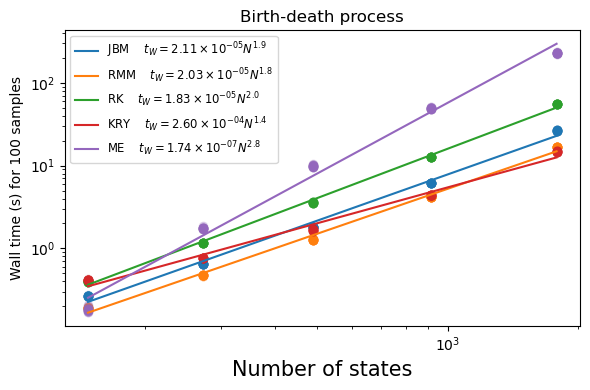

In [7]:
fig = plt.figure(figsize=(6,4))

for i in range(5):
    T,S = TS_list[i]
    plt.scatter(S,T,alpha=.25)
    plt.plot(x_pred,y_list[i],label=order_name[i]+equation(popt_list[i]))



plt.xscale("log")
plt.yscale("log")
plt.ylabel('Wall time (s) for 100 samples')
plt.xlabel('Number of states',size=15)
plt.title('Birth-death process')
plt.legend(fontsize='small')
plt.tight_layout()
plt.savefig('fig3/Fig-scaling.png',dpi=600)

In [8]:
dfset = [pd.read_csv('times/2S_{}_times_20.csv'.format(name)) for name in order[:-1]]
TS_list = [filter_dataframe(df) for df in dfset]

S_test = TS_list[-1][-1]
x_pred = np.exp(np.linspace(np.log(S_test.min()),np.log(S_test.max()),51))
lx_pred = np.log(x_pred)

popt_list = [curve_fit(line, np.log(T), np.log(S))[0] for (S,T) in TS_list]
y_list = [np.exp(line(lx_pred,*popt)) for popt in popt_list]

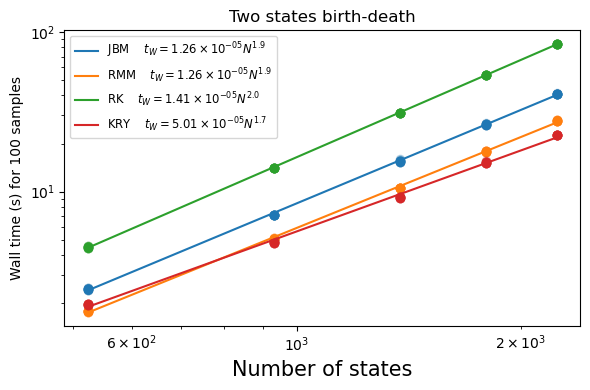

In [9]:
fig = plt.figure(figsize=(6,4))

for i in range(4):
    T,S = TS_list[i]
    plt.scatter(S,T,alpha=.25)
    plt.plot(x_pred,y_list[i],label=order_name[i]+equation(popt_list[i]))



plt.xscale("log")
plt.yscale("log")
plt.ylabel('Wall time (s) for 100 samples')
plt.xlabel('Number of states',size=15)
plt.title('Two states birth-death')
plt.legend(fontsize='small')
plt.tight_layout()
plt.savefig('fig3/Fig-scaling-2S.png',dpi=600)

In [10]:
dfset = [pd.read_csv('times/STS_{}_times_20.csv'.format(name)) for name in order[:-1]]
TS_list = [filter_dataframe(df) for df in dfset]

S_test = TS_list[-1][-1]
x_pred = np.exp(np.linspace(np.log(S_test.min()),np.log(S_test.max()),51))
lx_pred = np.log(x_pred)

popt_list = [curve_fit(line, np.log(T), np.log(S))[0] for (S,T) in TS_list]
y_list = [np.exp(line(lx_pred,*popt)) for popt in popt_list]

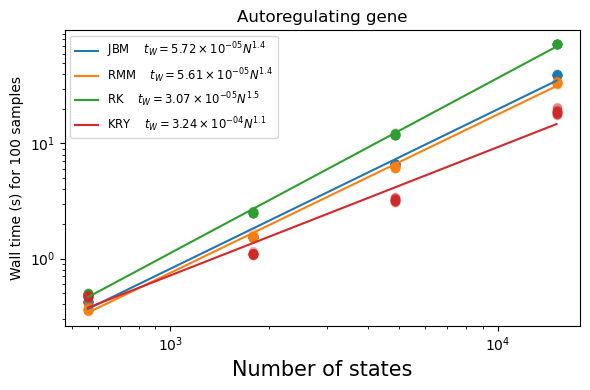

In [11]:
fig = plt.figure(figsize=(6,4))

for i in range(4):
    T,S = TS_list[i]
    plt.scatter(S,T,alpha=.25)
    plt.plot(x_pred,y_list[i],label=order_name[i]+equation(popt_list[i]))



plt.xscale("log")
plt.yscale("log")
plt.ylabel('Wall time (s) for 100 samples')
plt.xlabel('Number of states',size=15)
plt.title('Autoregulating gene')
plt.legend(fontsize='small')
plt.tight_layout()
plt.savefig('fig3/Fig-scaling-STS.png',dpi=600)